In [146]:
using SparseIR
using Plots, LaTeXStrings

In [104]:
#include("..scripts/example1.jl")
include("../scripts/example2_DMFT.jl")
GF = GImp;

Generating Eigenspace:  59.9% done.

  Activating project at `~/Codes/jED.jl`


Eigenspace generated!                  
E₀ = -5.338751227657934
Z  = 2.253746593564837
E  = 0.014132335331147421
n=1.0054442546494928


  Activating project at `~/Codes/jED.jl`


Eigenspace generated!                  
     Calculating GImp
Solution using Lsq:    ϵₖ =   40.3549   6.0065   -1.621   0.2724
                       Vₖ =    0.0235  -0.4628    0.363   0.2021
 -> sum(Vₖ²) = 0.3873647748572854
Eigenspace generated!                  
     Calculating GImp
Solution using Lsq:    ϵₖ =    3.2153   1.2978  -1.3872   0.1673
                       Vₖ =    0.2803  -0.1721   0.3321   0.1339
 -> sum(Vₖ²) = 0.23633384090726006
Eigenspace generated!                  
     Calculating GImp
Solution using Lsq:    ϵₖ =    2.2672   0.1714  -1.5712  -0.8227
                       Vₖ =    0.3236  -0.1142   0.3121   0.1357
 -> sum(Vₖ²) = 0.2336116117313156
Eigenspace generated!                  
     Calculating GImp
Solution using Lsq:    ϵₖ =    2.3098   0.1705  -1.6348  -0.8328
                       Vₖ =    0.3315   -0.095   0.3039    0.161
 -> sum(Vₖ²) = 0.23716955839224432
Eigenspace generated!                  
     Calculating GImp
Solution using Lsq:    ϵₖ =    2

In [311]:
function eval_sparseIR(siν, arr::jED.OffsetVector)
    map(x->arr[x.n-1], siν.sampling_points)
end

# Basis and Grid
ωmax = 2.0*U
ε = 1e-12
basis = FiniteTempBasis{Fermionic}(β, ωmax, ε, max_size=20)
siν = MatsubaraSampling(basis; positive_only=true)
νnGrid_IR = eval_sparseIR(siν, νnGrid)
GF_IR_pre = eval_sparseIR(siν, GF)

#Preallocs (use fit() instead of fit!() to avoid this)
Gl      = Vector{ComplexF64}(undef, size(siν.matrix,2))
GF_test = Vector{ComplexF64}(undef, size(siν.matrix,1))
workarr = Vector{ComplexF64}(undef, SparseIR.workarrlength(siν, GF_test))

fit!(Gl, siν, GF_IR_pre; workarr=workarr);
evaluate!(GF_test, siν, Gl)
#Gl = fit(siν, GF_IR_pre; dim = 1);
#GF_test = evaluate(siν, Gl)


basisΣ = AugmentedBasis(basis, MatsubaraConst)
siνΣ = MatsubaraSampling(basisΣ; positive_only=true)
νnGridΣ_IR = eval_sparseIR(siνΣ, νnGrid)
Σ_IR_pre = eval_sparseIR(siνΣ, ΣImp)

Σl       = Vector{ComplexF64}(undef, size(siνΣ.matrix,2))
Σ_test   = Vector{ComplexF64}(undef, size(siνΣ.matrix,1))
workarrΣ = Vector{ComplexF64}(undef, SparseIR.workarrlength(siνΣ, Σ_test))

fit!(Σl, siνΣ, Σ_IR_pre; workarr=workarrΣ);
evaluate!(Σ_test, siνΣ, Σl);
#Σl = fit(siνΣ, Σ_IR_pre; dim = 1);
#Σ_test = evaluate(siνΣ, Σl);

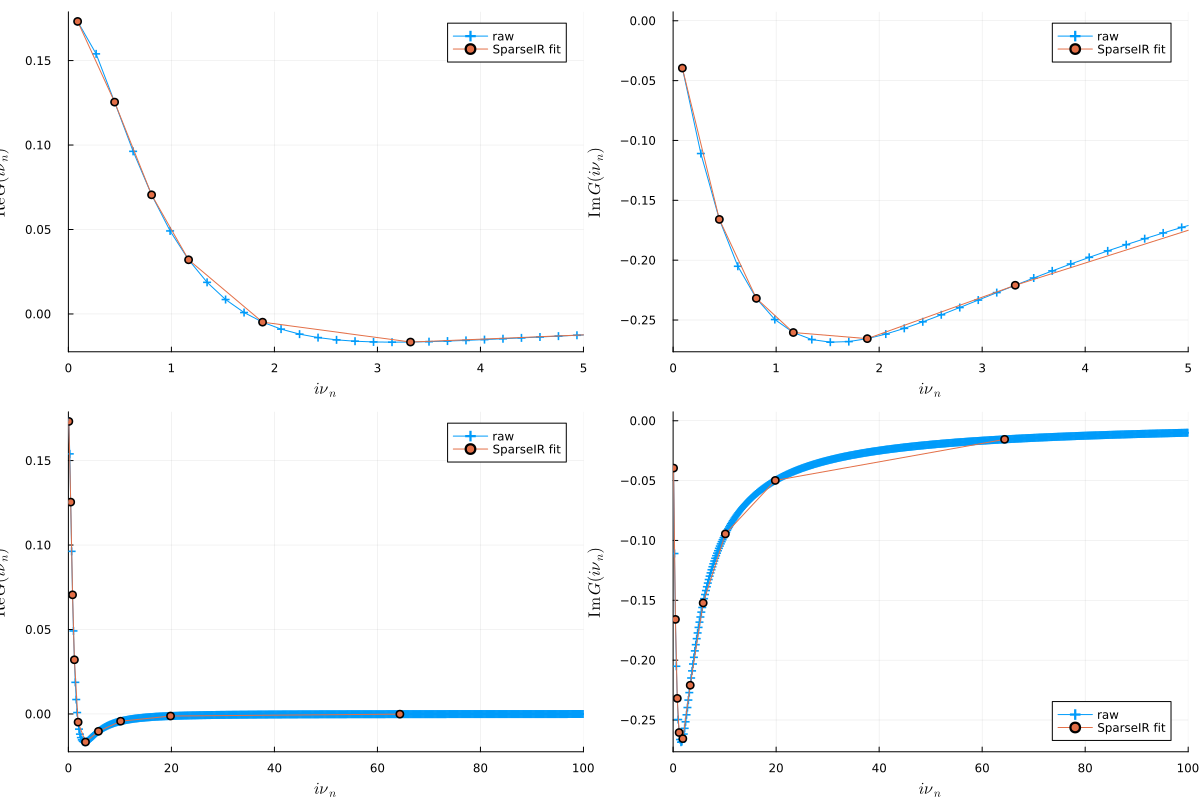

In [312]:
p1 = plot(imag(νnGrid.parent), real(GF.parent), markershape=:auto, xlims=(0,5), ylabel=L"\mathrm{Re}\, G(i\nu_n)", xlabel=L"i\nu_n", label="raw")
plot!(imag(νnGrid_IR), real(GF_test), markershape=:auto, label="SparseIR fit")
p2 = plot(imag(νnGrid.parent), imag(GF.parent), markershape=:auto, xlims=(0,5), ylabel=L"\mathrm{Im}\, G(i\nu_n)", xlabel=L"i\nu_n", label="raw")
plot!(imag(νnGrid_IR), imag(GF_test), markershape=:auto, label="SparseIR fit")
p3 = plot(imag(νnGrid.parent), real(GF.parent), markershape=:auto, xlims=(0,100), ylabel=L"\mathrm{Re}\, G(i\nu_n)", xlabel=L"i\nu_n", label="raw")
plot!(imag(νnGrid_IR), real(GF_test), markershape=:auto, label="SparseIR fit")
p4 = plot(imag(νnGrid.parent), imag(GF.parent), markershape=:auto, xlims=(0,100), ylabel=L"\mathrm{Im}\, G(i\nu_n)", xlabel=L"i\nu_n", label="raw")
plot!(imag(νnGrid_IR), imag(GF_test), markershape=:auto, label="SparseIR fit")
plot(p1, p2, p3, p4, size=(1200,800))

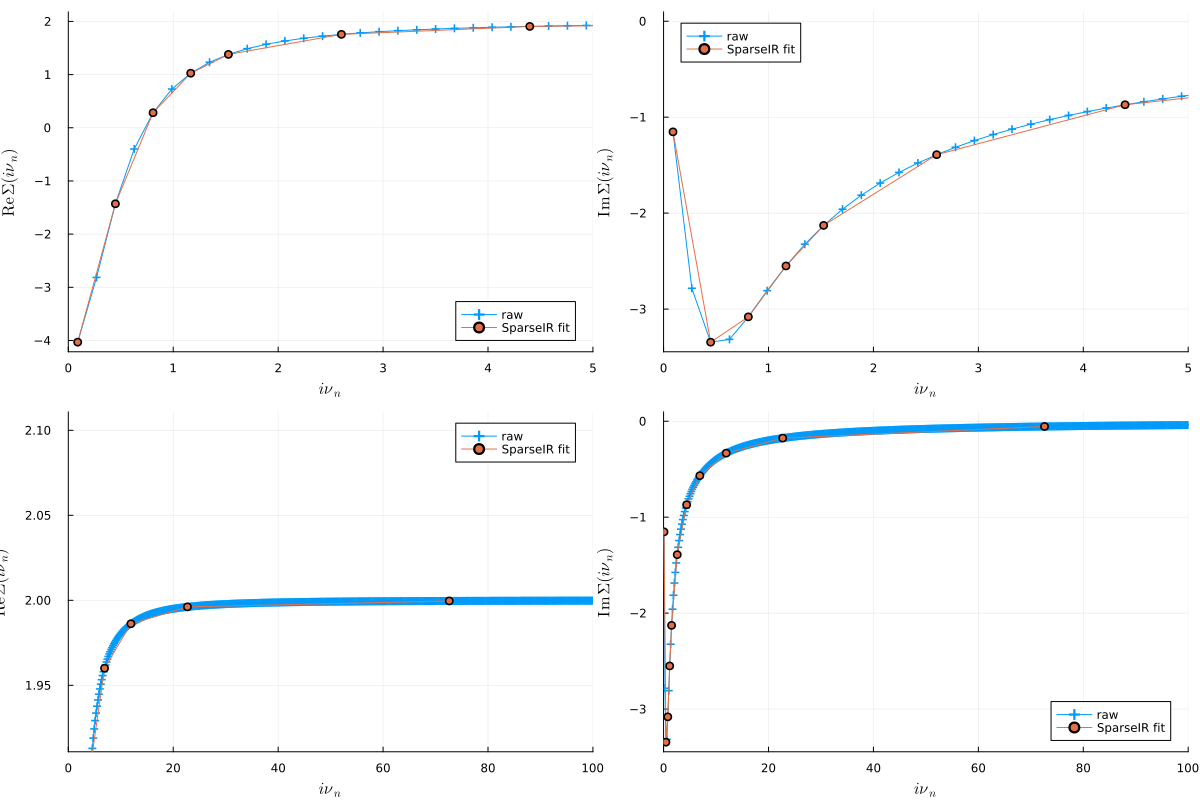

In [313]:
p1 = plot(imag(νnGrid.parent), real(ΣImp.parent), markershape=:auto, xlims=(0,5), ylabel=L"\mathrm{Re}\, \Sigma(i\nu_n)", xlabel=L"i\nu_n", label="raw")
plot!(imag(νnGridΣ_IR), real(Σ_test), markershape=:auto, label="SparseIR fit")
p2 = plot(imag(νnGrid.parent), imag(ΣImp.parent), markershape=:auto, xlims=(0,5), ylabel=L"\mathrm{Im}\, \Sigma(i\nu_n)", xlabel=L"i\nu_n", label="raw")
plot!(imag(νnGridΣ_IR), imag(Σ_test), markershape=:auto, label="SparseIR fit")
p3 = plot(imag(νnGrid.parent), real(ΣImp.parent), markershape=:auto, xlims=(0,100), ylabel=L"\mathrm{Re}\, \Sigma(i\nu_n)", xlabel=L"i\nu_n", label="raw", ylims=(U*dens/2-0.1, U*dens/2+0.1))
plot!(imag(νnGridΣ_IR), real(Σ_test), markershape=:auto, label="SparseIR fit")
p4 = plot(imag(νnGrid.parent), imag(ΣImp.parent), markershape=:auto, xlims=(0,100), ylabel=L"\mathrm{Im}\, \Sigma(i\nu_n)", xlabel=L"i\nu_n", label="raw")
plot!(imag(νnGridΣ_IR), imag(Σ_test), markershape=:auto, label="SparseIR fit")
plot(p1, p2, p3, p4, size=(1200,800))

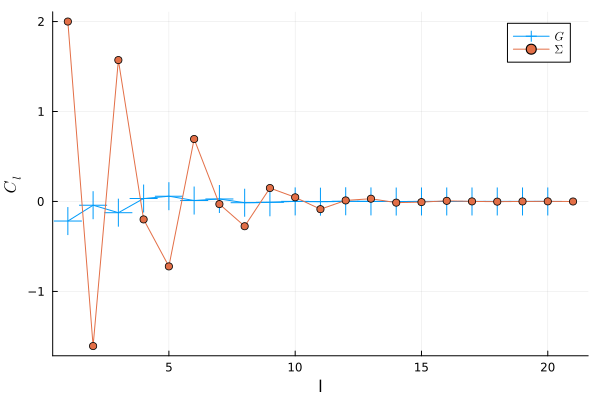

In [309]:
plot(real(Gl), markershape=:auto, markersize=14, ylabel=L"C_l", label=L"G",xlabel="l")
plot!(real(Σl), markershape=:auto, ylabel=L"C_l", label=L"\Sigma",xlabel="l")